## Exercise 1

Given the following data:

| Tid | Refund | Marital Status | Taxable Income (K) | Cheat |
|-----|--------|----------------|--------------------|-------|
| 1   | Yes    | Single         | 125                | No    |
| 2   | No     | Married        | 100                | No    |
| 3   | No     | Single         | 70                 | No    |
| 4   | Yes    | Married        | 120                | No    |
| 5   | No     | Divorced       | 95                 | Yes   |
| 6   | No     | Married        | 60                 | No    |
| 7   | Yes    | Divorced       | 220                | No    |
| 8   | No     | Single         | 85                 | Yes   |
| 9   | No     | Married        | 75                 | No    |
| 10  | No     | Single         | 90                 | Yes   |

What is the best first split (using Gini - note, for the continuous feature, check quartile boundaries).

To determine the best first split for the given dataset using the Gini index, we will calculate the Gini index for each feature, including both categorical and continuous features. For the continuous feature "Taxable Income (K)", we will consider splits at quartile boundaries.

### Step 1: Calculate Gini Index for the Entire Dataset

First, calculate the Gini index for the entire dataset to establish a baseline. The Gini index is calculated as:

$$ Gini = 1 - \sum (p_i)^2 $$

where $p_i$ is the proportion of samples belonging to class $i$.

For the target "Cheat", we have 3 "Yes" and 7 "No" out of 10 instances.

$$ Gini_{\text{dataset}} = 1 - \left( (\frac{7}{10})^2 + (\frac{3}{10})^2 \right) $$


In [24]:
1 - (.7**2 + .3**2)

0.42000000000000004



### Step 2: Calculate Gini Index for Each Feature

#### Categorical Features: "Refund" and "Marital Status"

Calculate the Gini index for each category within these features and use a weighted average for the feature's overall Gini index.

For "Refund":

- "Yes": 3 instances (2 "No" cheat, 1 "Yes" cheat)
- "No": 7 instances (4 "No" cheat, 3 "Yes" cheat)

$$ Gini_{\text{Refund = Yes}} = 1 - \left( (\frac{2}{3})^2 + (\frac{1}{3})^2 \right) $$

$$ Gini_{\text{Refund = No}} = 1 - \left( (\frac{4}{7})^2 + (\frac{2}{3})^2 \right) $$

For "Marital Status":

- "Single": 4 instances (1 "No" cheat, 3 "Yes" cheat)
- "Married": 4 instances (4 "No" cheat, 0 "Yes" cheat)
- "Divorced": 2 instances (1 "No" cheat, 1 "Yes" cheat)

Calculate similarly.

#### Continuous Feature: "Taxable Income (K)"

Determine quartile boundaries and calculate the Gini index for splits at these boundaries.

### Step 3: Choose the Best Split

The best split is the one with the lowest Gini index after the split (indicating the highest purity gain).

Let's perform the calculations for "Refund" as an example:

$$ Gini_{\text{Refund = Yes}} = 1 - \left( (\frac{2}{3})^2 + (\frac{1}{3})^2 \right) = 1 - \left( \frac{4}{9} + \frac{1}{9} \right) = 1 - \frac{5}{9} = \frac{4}{9} $$

$$ Gini_{\text{Refund = No}} = 1 - \left( (\frac{4}{7})^2 + (\frac{3}{7})^2 \right) = 1 - \left( \frac{16}{49} + \frac{9}{49} \right) = 1 - \frac{25}{49} = \frac{24}{49} $$

The overall Gini for "Refund" would be the weighted average based on the number of instances in each category:

$$ Gini_{\text{Refund}} = \frac{3}{10} \times Gini_{\text{Refund = Yes}} + \frac{7}{10} \times Gini_{\text{Refund = No}} $$

You'd perform similar calculations for "Marital Status" and the split on "Taxable Income (K)" based on quartile boundaries.



In [25]:
import pandas as pd

# Data
data = {
    'Example': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Refund': ['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No'],
    'Marital Status': ['Single', 'Married', 'Single', 'Married', 'Divorced', 'Married', 'Divorced', 'Single', 'Married', 'Single'],
    'Taxable Income (K)': [125, 100, 70, 120, 95, 60, 220, 85, 75, 90],
    'Cheat': ['Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)

# Calculate quartile boundaries for the "Taxable Income (K)" column
quartiles = df['Taxable Income (K)'].quantile([0.25, 0.5, 0.75]).tolist()

quartiles


[77.5, 92.5, 115.0]

## Exercise 2

Build a decision tree to fit the [federalist papers](https://www.kaggle.com/datasets/tobyanderson/federalist-papers_) data, available in the data directory (click on the link to find out more information about this data). Note that you should restrict your analysis to papers by Hamilton or Madison.  Plot your training and test scores to pick a value for ccp_alpha. What did you pick?  Run your trained classifier on the "disputed" papers.  What does your model tell you? 

In [1]:
import pandas as pd
data = pd.read_csv("./data/federalistpapers.csv")
data.author.value_counts()

author
Hamilton    51
Madison     15
dispt       11
Jay          5
HM           3
Name: count, dtype: int64

In [19]:
# Initial data prep

import pandas as pd
data = pd.read_csv("./data/federalistpapers.csv")
data.author.value_counts()


data = data.drop("filename",axis=1)
train = data[data.author!="dispt"]
test = data[data.author=="dispt"]
train = train[train.author.isin(["Hamilton","Madison"])]
train.author.value_counts()
train['author'] = train.author == "Madison"
train.author.value_counts()


author
False    51
True     15
Name: count, dtype: int64

In [11]:
# Splitting the data

from sklearn.model_selection import train_test_split

X = train.drop(['author'],axis=1)
y = train.author

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

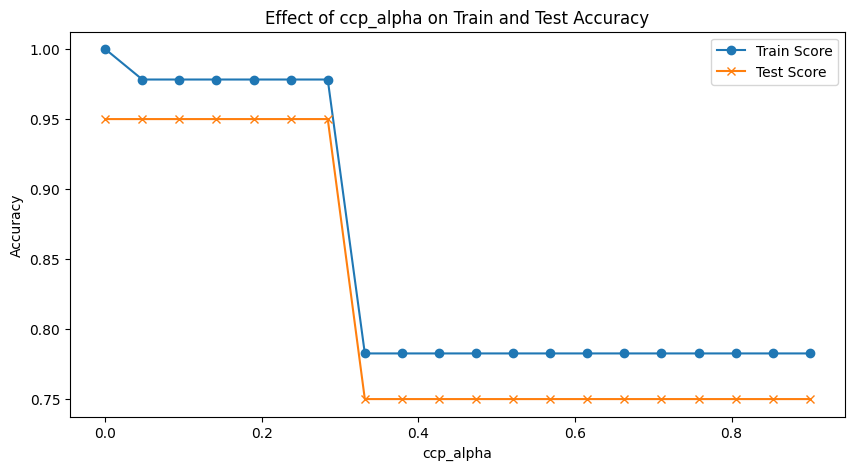

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train decision trees with different ccp_alphas
ccp_alphas = np.linspace(.9, 0, 20)
train_scores = []
test_scores = []



index = 0
for i,ccp_alpha in enumerate(ccp_alphas):
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    
    train_score = accuracy_score(y_train, clf.predict(X_train))
    test_score = accuracy_score(y_test, clf.predict(X_test))
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
   

# Plot the train and test scores
plt.figure(figsize=(10, 5))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Score')
plt.plot(ccp_alphas, test_scores, marker='x', label='Test Score')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of ccp_alpha on Train and Test Accuracy')
plt.show()

In [21]:
test = test.drop(['author'],axis=1)

In [22]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=.2)
clf.fit(X, y)
clf.predict(test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## Exercise 3

Build a voting classifier for the federalist papers, using all of the non-ensemble methods you've been exposed to in this class thus far (i.e., KNN, SVM, logistic regression, naive bayes, SGDClassifier, decision tree).

1) Compare this to a RandomForest classifier.  Which works the best?
2) Compare this to a GradientBoosting classifier.  Which works the best?
3) Add the RandomForest and GradientBoosting classifiers to your voting classifier.  Does you performance improve?

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split


data = load_wine()

# We'll use a data frame to make sure we get real feature names out
X = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
X_test.shape

(36, 13)

In [39]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(random_state=42,solver="saga")
svm_clf = SVC(probability=True, random_state=42) # 'probability=True' to enable soft voting
tree_clf = DecisionTreeClassifier(random_state=42)
knn_clf = KNeighborsClassifier()
nb_clf = GaussianNB()


voting_hard_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svm', svm_clf), ('tree', tree_clf),('knn',knn_clf),('nb',nb_clf)],
    voting='hard')
voting_hard_clf.fit(X_train, y_train)

y_pred =voting_hard_clf.predict(X_test)
accuracy_score(y_test,y_pred)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9444444444444444

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

rf_clf.fit(X_train,y_train)
gb_clf.fit(X_train,y_train)

rf_pred = rf_clf.predict(X_test)
gb_pred= gb_clf.predict(X_test)
print(f"Random forest {accuracy_score(y_test,rf_pred)}")
print(f"Gradient boosting {accuracy_score(y_test,gb_pred)}")


Random forest 1.0
Gradient boosting 0.9444444444444444


In [45]:

rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

voting_hard_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('svm', svm_clf), ('tree', tree_clf),('knn',knn_clf),('nb',nb_clf),
                ('rf',rf_clf),("gb",gb_clf)],
    voting='hard')
voting_hard_clf.fit(X_train, y_train)

y_pred =voting_hard_clf.predict(X_test)
accuracy_score(y_test,y_pred)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9722222222222222

## Exercise 4

When does it make sense to use a Bagging Classifier?  In the following, explore different data parameters to develop your intuition for which classifier makes sense in which situation. 

1. Gradually increase the noise in the data (using the noise parameter).  How do the different classifiers perform.  Why?


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

X, y = make_moons(n_samples=300, noise=.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_train_pred_tree = tree.predict(X_train)
print("Decision Tree Accuracy (train):", accuracy_score(y_train, y_train_pred_tree))
print("Decision Tree Accuracy (test):", accuracy_score(y_test, y_pred_tree))



log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_train_pred_log = log_reg.predict(X_train)
print("Logistic Regression Accuracy (train):", accuracy_score(y_train, y_train_pred_log))
print("Logistic Regression Accuracy (test):", accuracy_score(y_test, y_pred_log))

Decision Tree Accuracy (train): 1.0
Decision Tree Accuracy (test): 0.7733333333333333
Logistic Regression Accuracy (train): 0.8311111111111111
Logistic Regression Accuracy (test): 0.84


2.  Now, do the same thing in the following.  What do you notice. How do you explain your observations?

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

max_samples = 100

X, y = make_moons(n_samples=300, noise=.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bag_tree = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, random_state=42,max_samples=max_samples)
bag_tree.fit(X_train, y_train)
y_pred_bag_train = bag_tree.predict(X_train)
y_pred_bag = bag_tree.predict(X_test)
print("Bagging Decision Tree Accuracy (train):", accuracy_score(y_train, y_pred_bag_train))
print("Bagging Decision Tree Accuracy (test):", accuracy_score(y_test, y_pred_bag))


bag_log = BaggingClassifier(LogisticRegression(), n_estimators=500, random_state=42,max_samples=max_samples)
bag_log.fit(X_train, y_train)
y_pred_bag_log_train = bag_log.predict(X_train)
y_pred_bag_log = bag_log.predict(X_test)
print("Bagging Logistic Regression Accuracy (train):", accuracy_score(y_train, y_pred_bag_log_train))
print("Bagging Logistic Regression Accuracy (test):", accuracy_score(y_test, y_pred_bag_log))

Bagging Decision Tree Accuracy (train): 0.9422222222222222
Bagging Decision Tree Accuracy (test): 0.8266666666666667
Bagging Logistic Regression Accuracy (train): 0.8222222222222222
Bagging Logistic Regression Accuracy (test): 0.8533333333333334


3. Now go back and start increasing the `max_samples` parameter.  How do things change? 

## Exercise 5

The "wine" dataset contains data about the chemical makeup of different varieties of wine and critics scores.  Use XGBoost to build a classifier for this data.  Manually tune the hyperparameters of the XGBoost model to try to achieve better accuracy on the test set than the baseline model. Some hyperparameters to consider tweaking:
   - `learning_rate`
   - `max_depth`
   - `n_estimators`
   - `gamma`
   - `subsample`
   - `colsample_bytree`

See [the online docs](https://xgboost.readthedocs.io/en/stable/parameter.html) for more info.

After tuning, use the `plot_importance` function again to see if feature importances have changed after tuning.


1. How did hyperparameter tuning affect the model's accuracy? Which hyperparameters seemed to have the most influence?
2. Did feature importances change after tuning? If so, why might that be?

In [23]:
# Run this if you don't have XGBoost installed
%pip install XGBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 5.7 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Baseline Accuracy: 0.9722


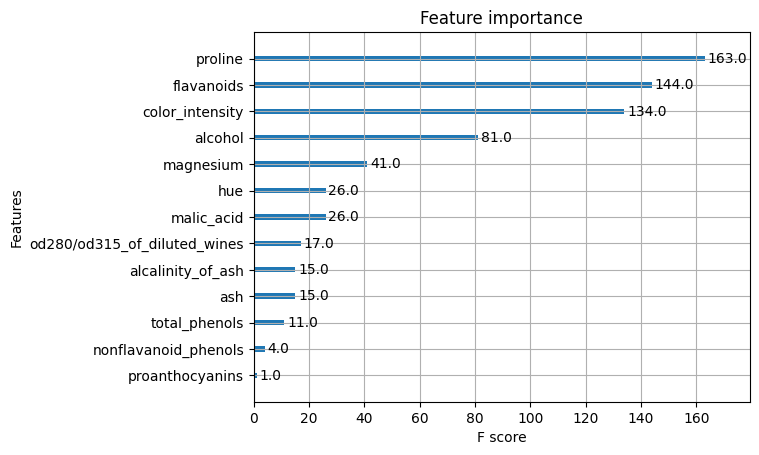

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance

data = load_wine()

# We'll use a data frame to make sure we get real feature names out
X = pd.DataFrame(data.data,columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = xgb.XGBClassifier(objective='multi:softprob', random_state=42,eta=.1,max_depth=10)
clf.fit(X_train, y_train)

baseline_accuracy = clf.score(X_test, y_test)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

plot_importance(clf)
plt.show()